# IRIS FLOWER CLASSIFICATION

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, classification_report
import seaborn as sns 

## Loading Dataset

In [2]:
df = pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Preprocessing

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
l = []
for i in df['species']:
    l.append(str(i).split('-')[1])

In [6]:
df['species'] = l

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Visualization

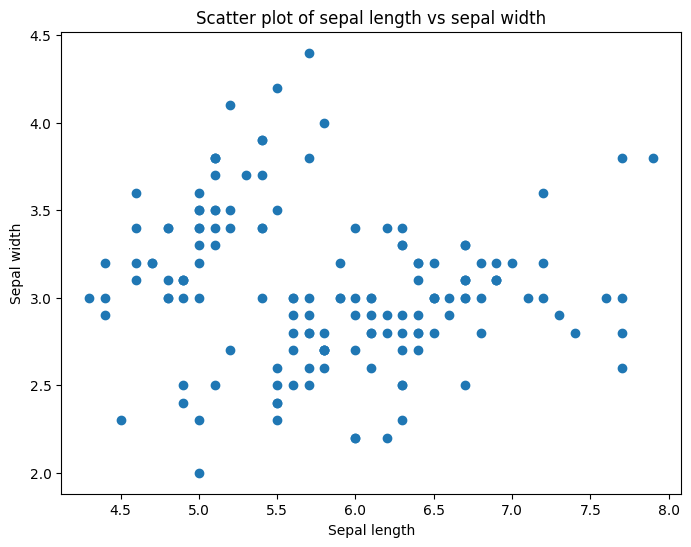

In [8]:
plt.figure(figsize=(8, 6)) 
plt.scatter(df['sepal_length'], df['sepal_width'])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Scatter plot of sepal length vs sepal width')
plt.show()

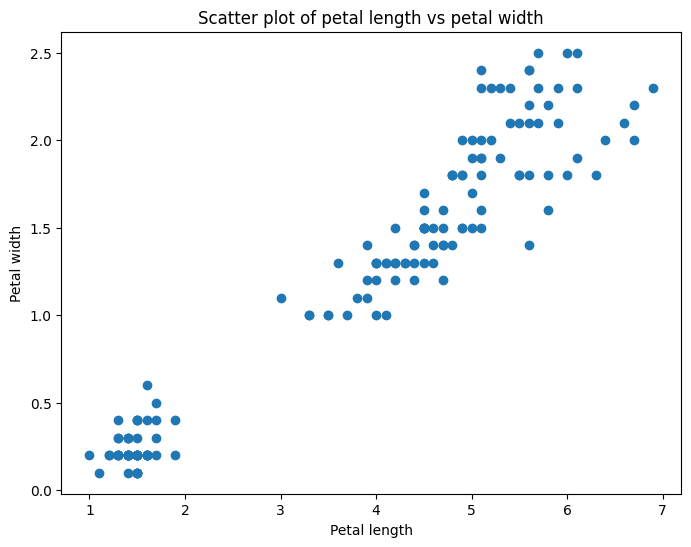

In [9]:
plt.figure(figsize=(8, 6)) 
plt.scatter(df['petal_length'], df['petal_width'])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Scatter plot of petal length vs petal width')
plt.show()

In [10]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Label Encoder

In [11]:
label_encoder = LabelEncoder()

In [12]:
categorical_col = df.select_dtypes(include=['object']).columns
for col in categorical_col:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df['species'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32>

## Train Test Split

In [14]:
x_data = df.drop(['species'], axis = 1)

In [15]:
y_data = df['species']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=123)

## Model Building

In [17]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

In [18]:
alg = [lr, dt, rfc, svc, knn, nb]

In [19]:
for i in alg:
    i = i.fit(x_train, y_train)
    y_predict = i.predict(x_test)
    print("Accuracy of {} is {}".format(i.__class__.__name__, accuracy_score(y_test, y_predict)))

Accuracy of LogisticRegression is 0.9333333333333333
Accuracy of DecisionTreeClassifier is 0.9333333333333333
Accuracy of RandomForestClassifier is 0.9555555555555556
Accuracy of SVC is 0.9111111111111111
Accuracy of KNeighborsClassifier is 0.9777777777777777
Accuracy of GaussianNB is 0.9555555555555556


#### Among the above models we select KNeighborsClassifier as it has better accuracy

In [20]:
y_predict = knn.predict(x_test)

## Evaluation Metrics

In [21]:
f1 = f1_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
precision = precision_score(y_test, y_predict, average='weighted')
confusion = confusion_matrix(y_test, y_predict)
report = classification_report(y_test, y_predict)

In [22]:
print("F1 score:",f1)

F1 score: 0.9775104427736007


In [23]:
print("Recall score:", recall)

Recall score: 0.9777777777777777


In [24]:
print("Precision:", precision)

Precision: 0.9790123456790124


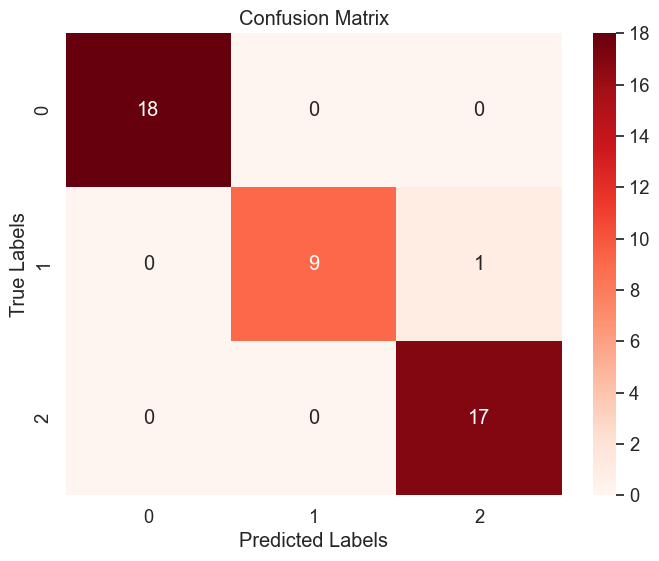

In [25]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show() 

In [26]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.90      0.95        10
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Predicting on unseen data

In [28]:
knn.predict([[4.8, 3.4, 1.2, 0.3]])

c:\Users\sahuk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])